# Defining the Question

### a) Specifying the Question

Predict the customers that could show higher intent towards a recommended credit card.

### b) Defining the Metric for Success

This project will be considered successful if we are able to create a prediction model with an accuracy scorer of 80% or higher and use it to make predictions.

### c) Understanding the context 

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given the DATASET with the following variables:

ID : Unique Identifier for a row

Gender: Gender of the Customer

Age : Age of the Customer (in Years)

Region_Code : Code of the Region for the customers

Occupation : Occupation Type for the customer

Channel_Code : Acquisition Channel Code for the Customer (Encoded)

Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company

Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

Is_Active : If the Customer is Active in last 3 Months

Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested

This dataset was part of May 2021 Jobathon conducted my analytics vidhya, for more info check:https://datahack.analyticsvidhya.com/contest/job-a-thon-2/
and https://www.kaggle.com/sajidhussain3/jobathon-may-2021-credit-card-lead-prediction 

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Model
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=de58f44ab9770865f1074984ec1aea259754228d37a55771f96358c96b0fcdb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ki6seh14/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
# Loading the Dataset from the source i.e. csv
# We are missing the Is_Lead column in the test data set
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df_train.shape[0]) + ' rows, and ' + str(df_train.shape[1]) + ' columns')

This train dataset has 245725 rows, and 11 columns


In [ ]:
# Determining the no. of records in our test dataset
# We are missing the Is_Lead column in the test data set
print('This test dataset has ' + str(df_test.shape[0]) + ' rows, and ' + str(df_test.shape[1]) + ' columns')

This test dataset has 105312 rows, and 10 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df_train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [ ]:
# checking the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# let us see the columns in our dataframe
print("***** Column names present in dataset *****")
df_train.columns

***** Column names present in dataset *****


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe
profile = ProfileReport(df_train, title="Credit Card Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

In [ ]:
# let us save our profile report
profile.to_file(output_file="Titanic_Profile_Report.html")

In [ ]:
# let us see the unique values of all our columns
#for col in df:
 #   print(df[col].unique())
 #df.describe(include='all').loc['unique', :]
for col in list(df_train):
    print(col)
    print(df_train[col].unique())

ID
['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
Gender
['Female' 'Male']
Age
[73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
Region_Code
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation
['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code
['X3' 'X1' 'X2' 'X4']
Vintage
[ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134]
Credit_Product
['No' nan 'Yes']

# Data Cleaning-Train Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df_train.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['id', 'gender', 'age', 'region_code', 'occupation', 'channel_code',
       'vintage', 'credit_product', 'avg_account_balance', 'is_active',
       'is_lead'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

## df_copy.drop(['id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
## df_copy.head()

In [ ]:
# let us check for missing values in our dataframe
null_list = list(df_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(df_copy[n])))
#We have missing values in the credit product column

id :  0
gender :  0
age :  0
region_code :  0
occupation :  0
channel_code :  0
vintage :  0
credit_product :  29325
avg_account_balance :  0
is_active :  0
is_lead :  0


In [ ]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframes

Shape of dataframe with no missing values:  (216400, 11)
Shape of dataframe with missing values:  (245725, 11)


# Data Cleaning-Test Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
test_copy = df_test.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
test_copy.columns = test_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['id', 'gender', 'age', 'region_code', 'occupation', 'channel_code',
       'vintage', 'credit_product', 'avg_account_balance', 'is_active'],
      dtype='object')

Index(['id', 'gender', 'age', 'region_code', 'occupation', 'channel_code',
       'vintage', 'credit_product', 'avg_account_balance', 'is_active'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
test_copy.duplicated().sum()

0

0

In [ ]:
# Let Us Drop the columns that do contribute to 
# whether a passenger survives or not 

# test_copy.drop(['id'], axis=1, inplace=True)

# # let us confirm that we have dropped the unnecessary columns
# test_copy.head()

In [ ]:
# let us check for missing values in our dataframe
null_list = list(test_copy.columns.values)
for n in null_list:
    print (n,": ",sum(pd.isnull(test_copy[n])))
#We have missing values in the credit product column

id :  0
gender :  0
age :  0
region_code :  0
occupation :  0
channel_code :  0
vintage :  0
credit_product :  12522
avg_account_balance :  0
is_active :  0
id :  0
gender :  0
age :  0
region_code :  0
occupation :  0
channel_code :  0
vintage :  0
credit_product :  12522
avg_account_balance :  0
is_active :  0


In [ ]:
# let us see how much information we lose by dropping the null values
test_clean = test_copy.dropna()
print('Shape of dataframe with no missing values: ', test_clean.shape)
print('Shape of dataframe with missing values: ', test_copy.shape)
# by dropping our null values we have dropped an insignificant number rows of our dataframe

Shape of dataframe with no missing values:  (92790, 10)
Shape of dataframe with missing values:  (105312, 10)


# Exploratory Data Analysis

In [64]:
# let us see some info on our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216400 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   216400 non-null  object
 1   gender               216400 non-null  object
 2   age                  216400 non-null  int64 
 3   region_code          216400 non-null  object
 4   occupation           216400 non-null  object
 5   channel_code         216400 non-null  object
 6   vintage              216400 non-null  int64 
 7   credit_product       216400 non-null  object
 8   avg_account_balance  216400 non-null  int64 
 9   is_active            216400 non-null  object
 10  is_lead              216400 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 19.8+ MB


In [66]:
# let us see some summary statistics of the dataset
df_clean.describe()

,age,vintage,avg_account_balance,is_lead
count,216400.000000,216400.000000,2.164000e+05,216400.000000
mean,42.807315,44.285522,1.115086e+06,0.153942
std,14.850996,31.235351,8.500172e+05,0.360894
min,23.000000,7.000000,2.079000e+04,0.000000
25%,29.000000,20.000000,5.958438e+05,0.000000
50%,41.000000,31.000000,8.805390e+05,0.000000
75%,53.000000,67.000000,1.346543e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7ebc91a10>,
      dtype=object)

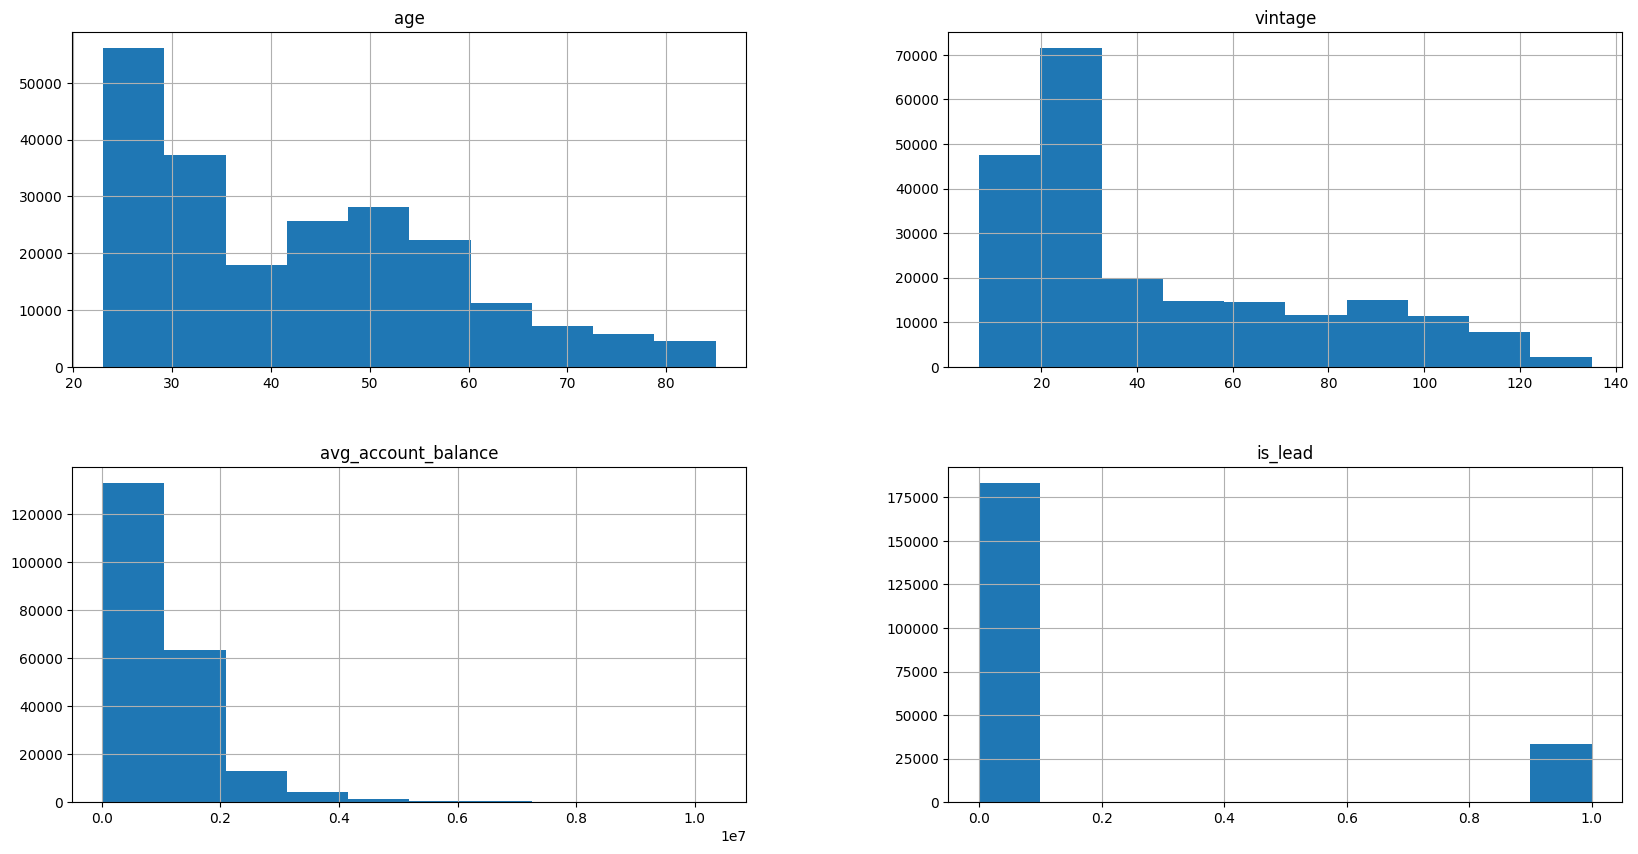

In [67]:
# let us plot histograms to visualize patterns in the data
df_clean.hist(figsize = (20,10))

Text(0.5, 1.0, 'Checking for outliers using boxplots')

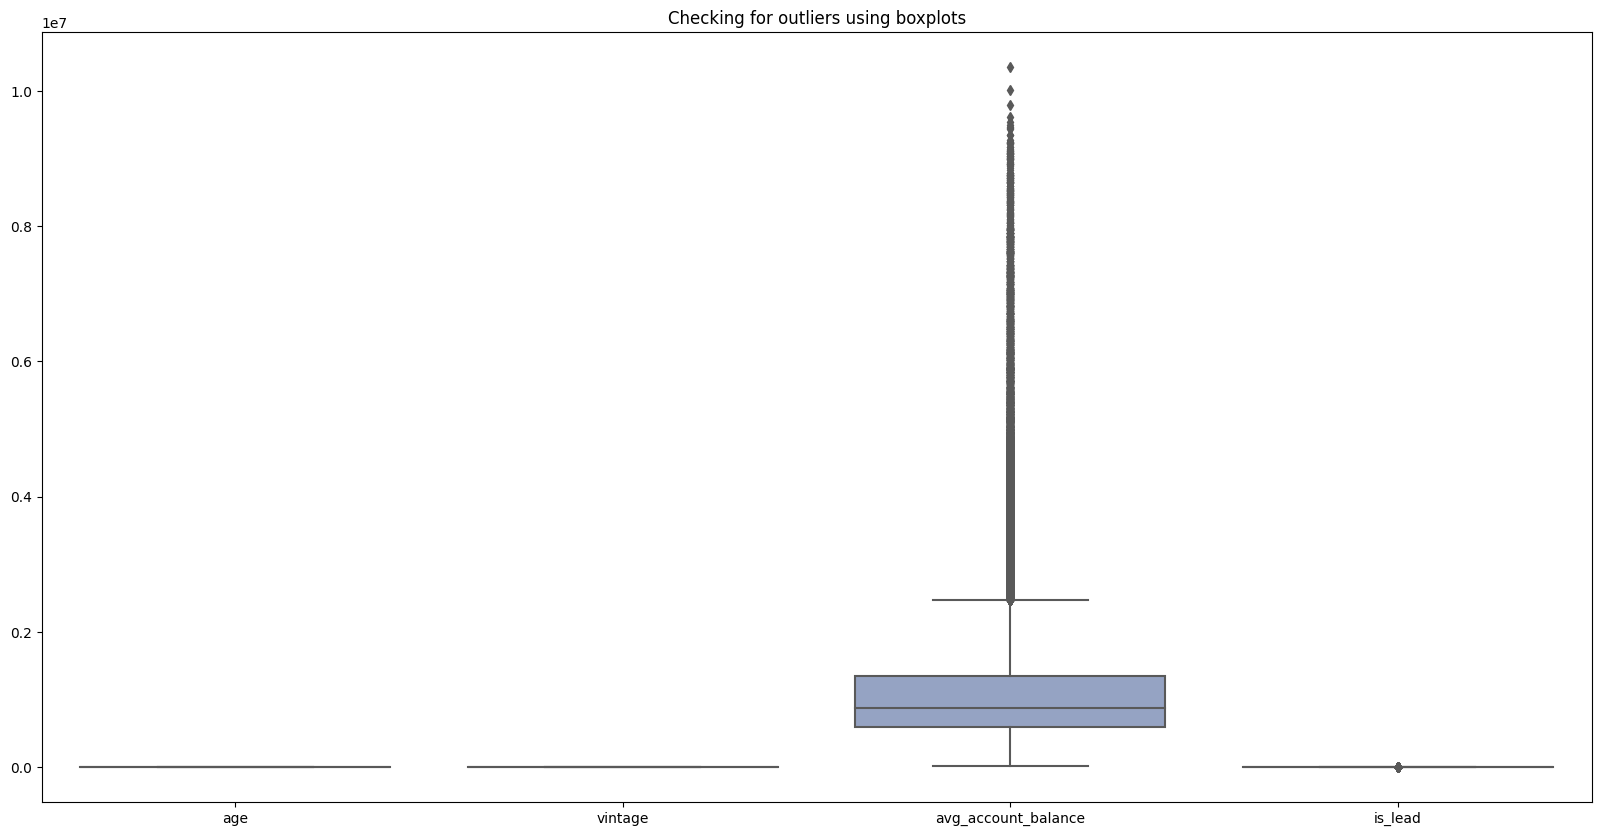

In [68]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_clean, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the outliers in each of the numerical columns

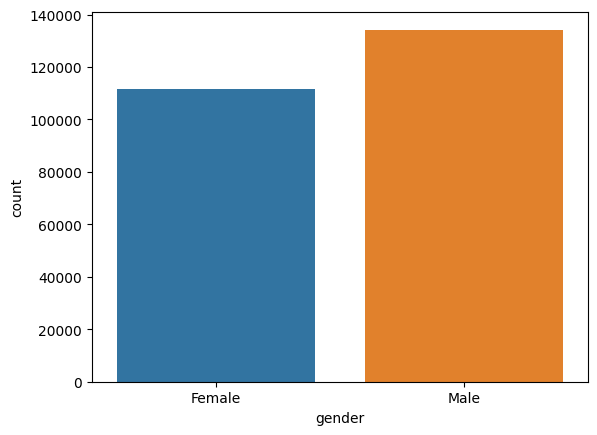

In [69]:
# let us see how many men and women are in our dataset

sns.countplot(x="gender", data = df_copy)

# we can see that there are more males than females

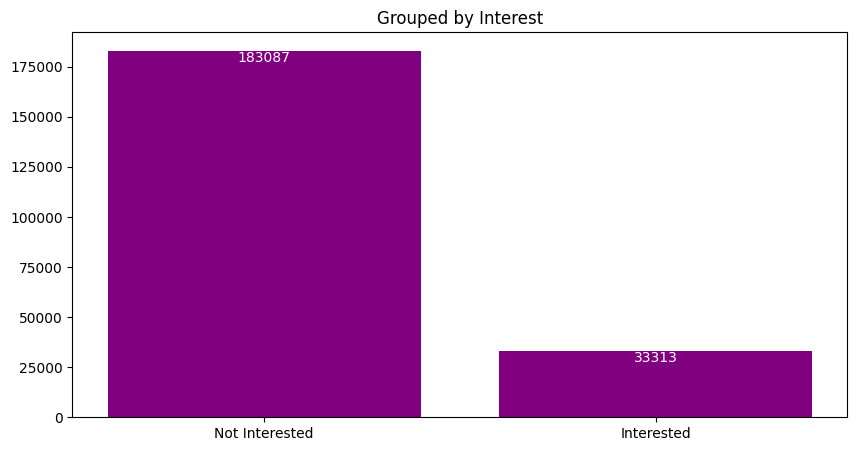

In [76]:
# let us see how many customers are interested in a credit card
# and in the process Get info about balanced or imbalanced data set.
#Interested: 0 = No, 1 = Yes

int_count = df_clean.groupby('is_lead')['is_lead'].count()

plt.figure(figsize=(10,5))
plt.bar(int_count.index, int_count.values, color='purple')
plt.title('Grouped by Interest')
plt.xticks([0,1],['Not Interested', 'Interested'])
for i, value in enumerate(int_count.values):
    plt.text(i, value-70, str(value), fontsize=10, color='white',
             horizontalalignment='center', verticalalignment='top')
plt.show()

# most of the customers are not interested in credit cards 
# and our data is highly imbalanced

In [84]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)

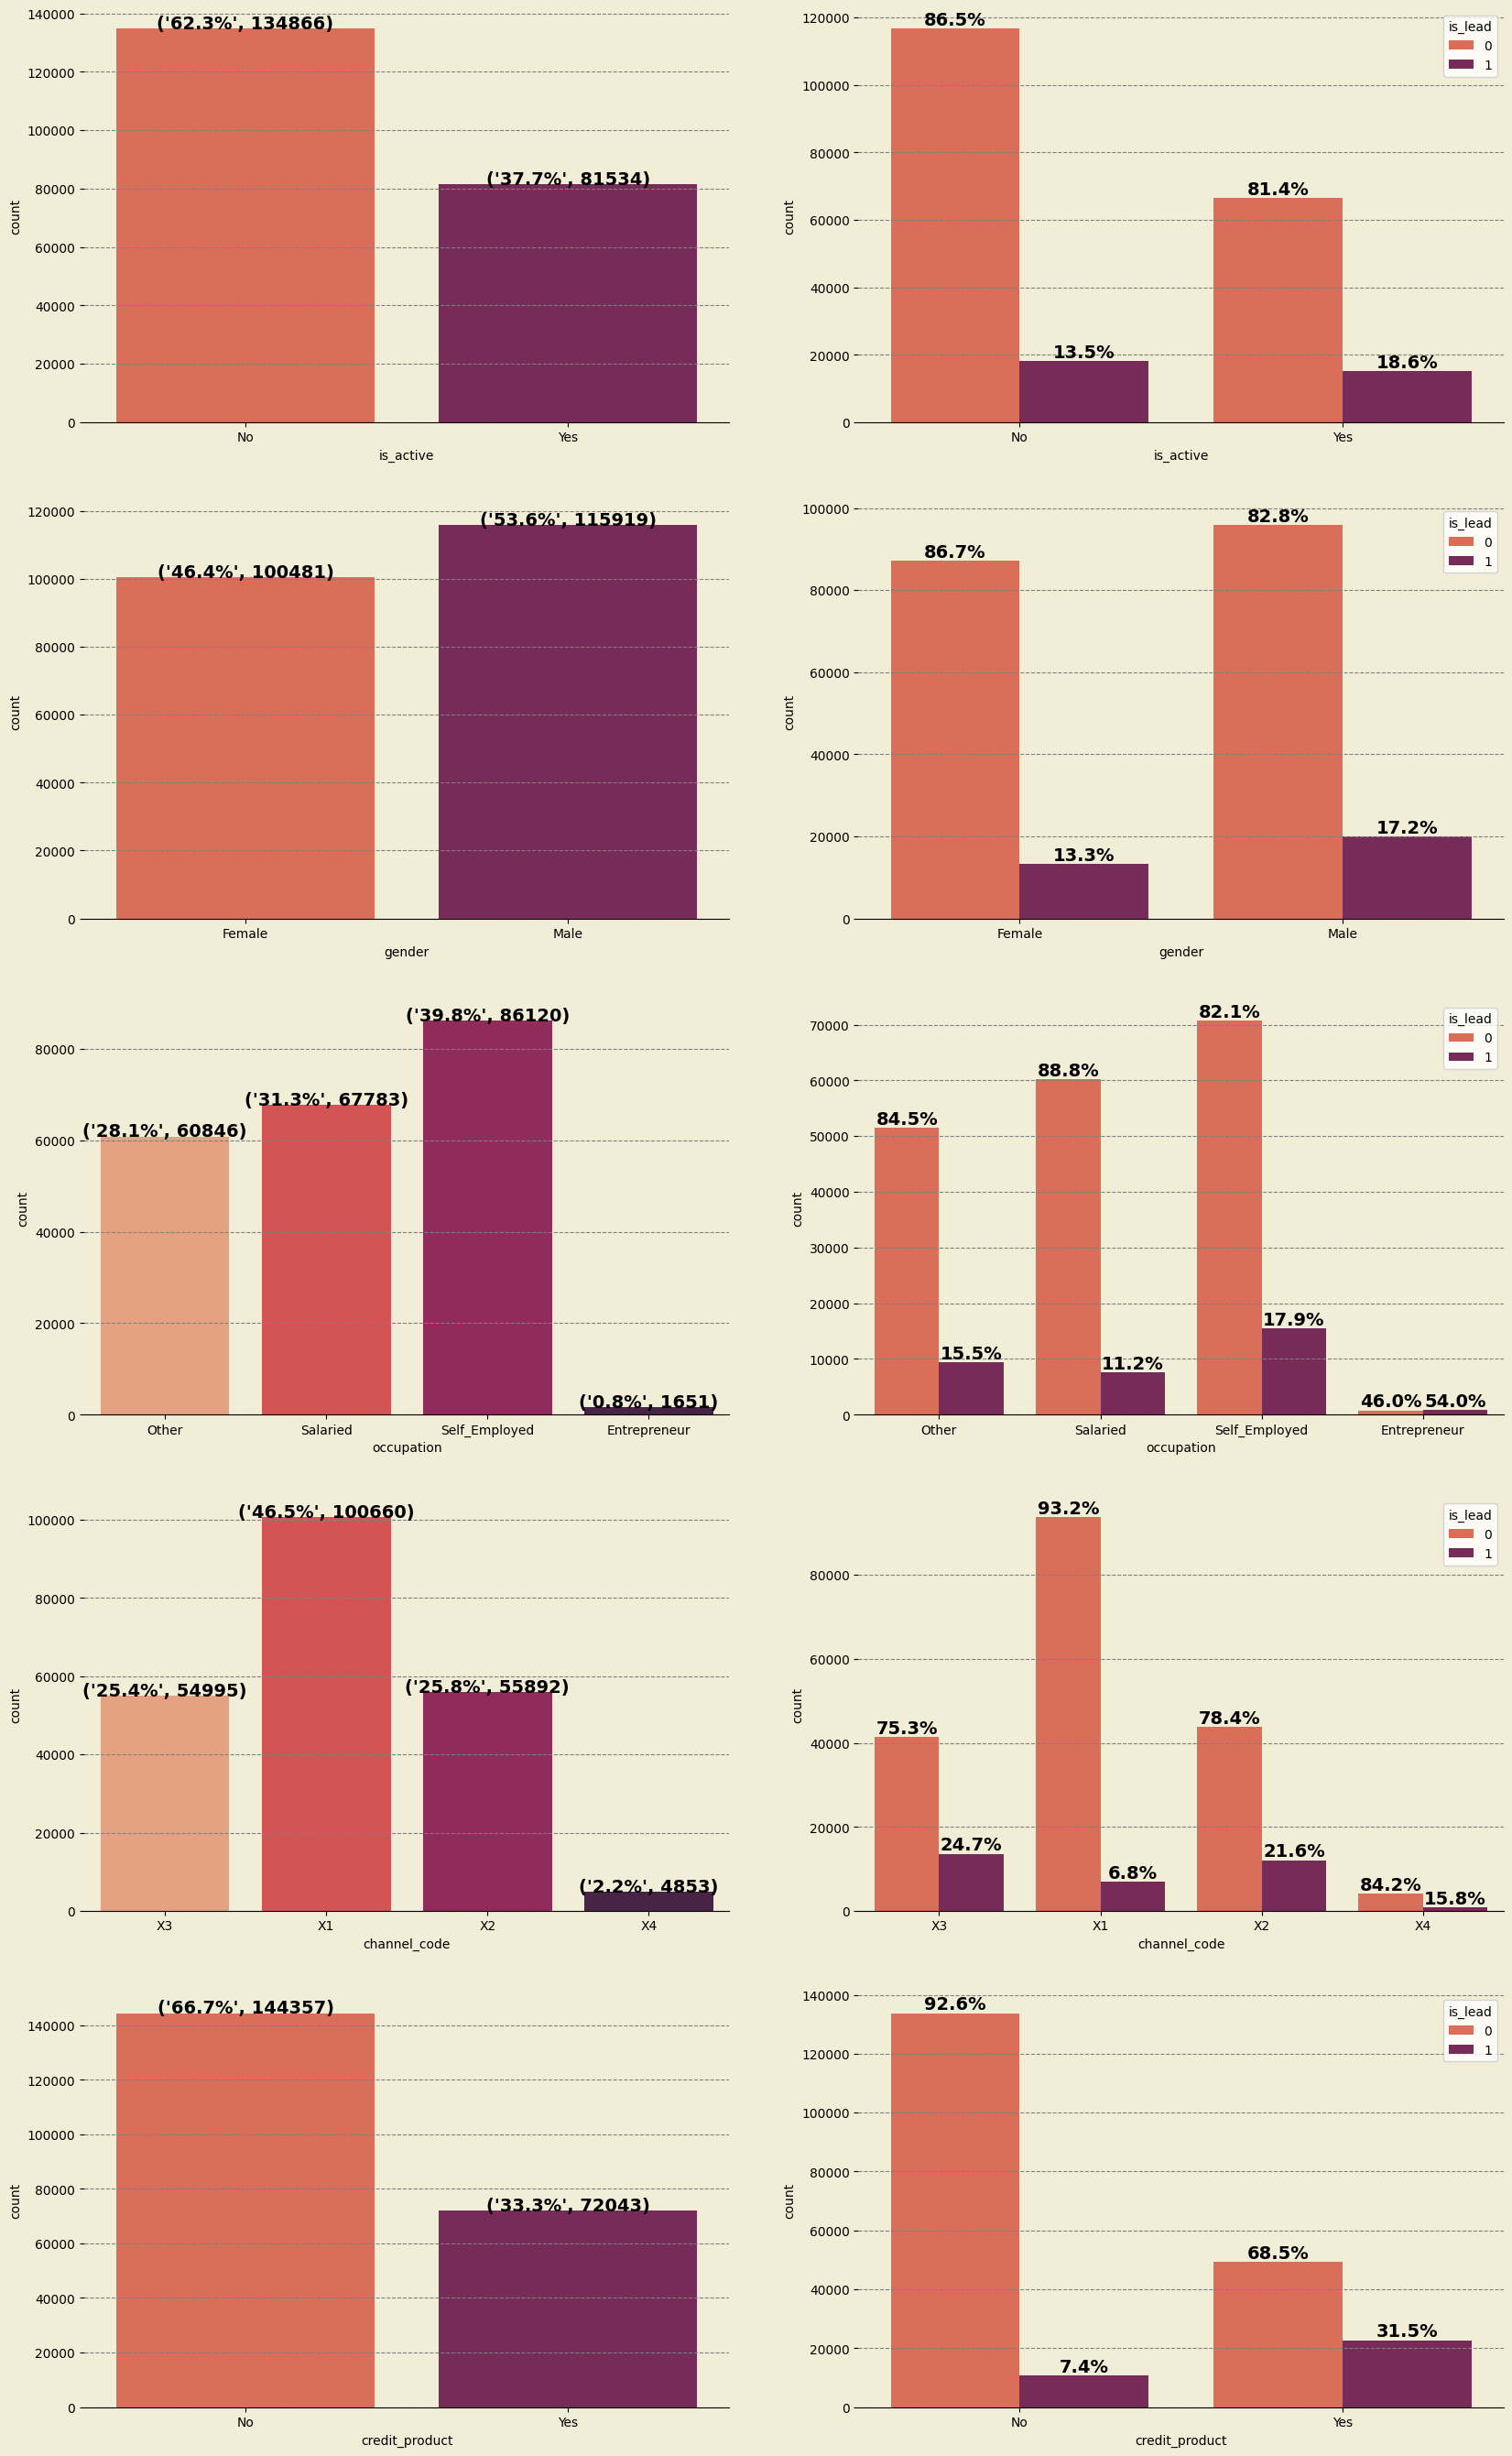

In [85]:
# let us se how the other columns relate to our target column
nrows=5
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
columns=['gender','occupation', 'channel_code','credit_product', 'is_active']

f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='gray')

    if (j==0):
      a1=sns.countplot(data=df_clean,x=columns[i-1],palette='rocket_r',ax=ax[i][j])
      without_hue(df_clean,columns[i-1],a1)
    elif (j==1):
      a2=sns.countplot(data=df_clean,x=columns[i-1],palette='rocket_r',ax=ax[i][j],hue="is_lead")
      with_hue(df_clean,columns[i-1],a2)

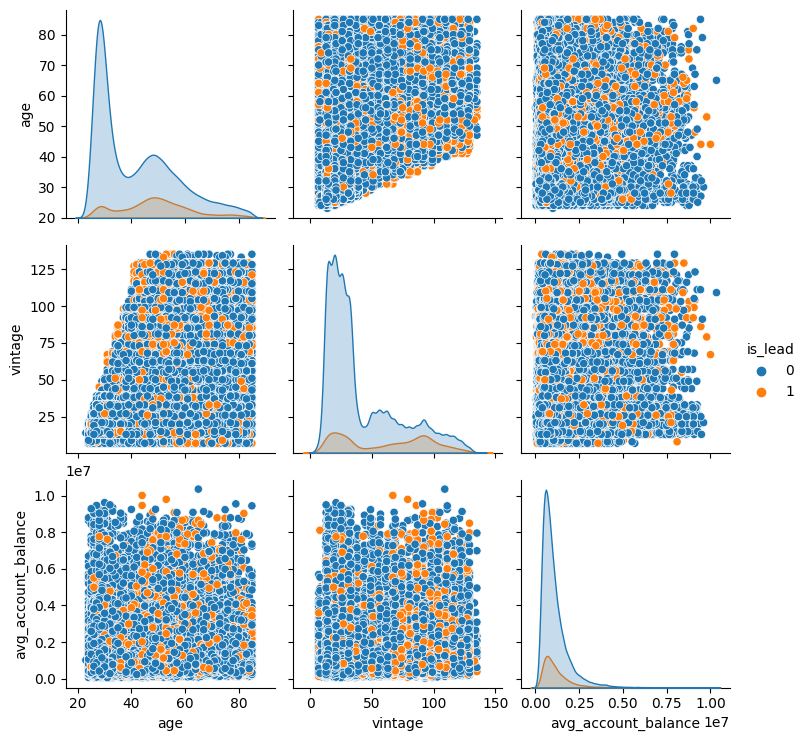

In [86]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_clean, hue="is_lead")
plt.show()

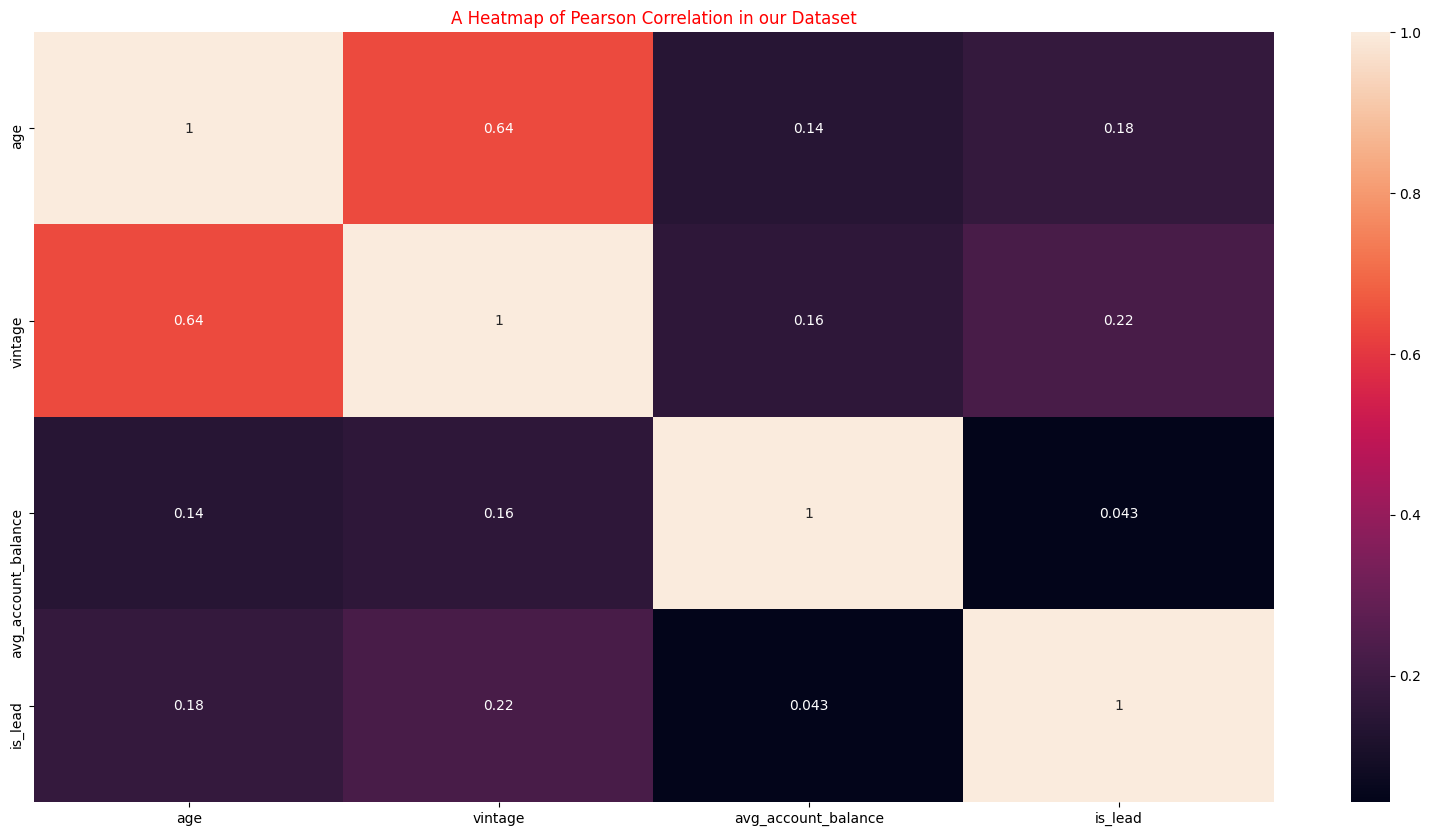

In [87]:
# Calculating the pearson coefficient correlation
a = df_clean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# From this we can see there is a correlation between t3 and tt4.

# EDA Conclusions

There are more males than females in our dataframe


# Feature Engineering

### extract age group from age column

In [91]:
df_clean['age'].describe()

count    216400.000000
mean         42.807315
std          14.850996
min          23.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          85.000000
Name: age, dtype: float64

In [93]:
#we need to convert the ‘age’ feature to agegroups
data = [df_clean, test_clean]
for dataset in data:
    dataset['agegroup'] = dataset['age'].astype(int)
    dataset.loc[ dataset['agegroup'] <= 22, 'age'] = 0
    dataset.loc[(dataset['agegroup'] > 23) & (dataset['agegroup'] <= 30), 'agegroup'] = 1
    dataset.loc[(dataset['agegroup'] > 31) & (dataset['agegroup'] <= 40), 'agegroup'] = 2
    dataset.loc[(dataset['agegroup'] > 41) & (dataset['agegroup'] <= 50), 'agegroup'] = 3
    dataset.loc[(dataset['agegroup'] > 51) & (dataset['agegroup'] <= 60), 'agegroup'] = 4
    dataset.loc[(dataset['agegroup'] > 61) & (dataset['agegroup'] <= 70), 'agegroup'] = 5
    dataset.loc[(dataset['agegroup'] > 71) & (dataset['agegroup'] <= 80), 'agegroup'] = 6
    dataset.loc[ dataset['agegroup'] > 81, 'agegroup'] = 7
# let's see how it's distributed 
print(df_clean['agegroup'].value_counts())
print(test_clean['agegroup'].value_counts())

1     66978
3     40590
2     32921
4     30956
5     13966
6      8516
31     8225
51     4669
41     3286
61     2316
7      2161
71     1128
81      687
23        1
Name: agegroup, dtype: int64
1     28747
3     17615
2     14019
4     13070
5      6016
6      3704
31     3484
51     1973
41     1463
7       987
61      927
71      499
81      286
Name: agegroup, dtype: int64


In [ ]:
# let us drop the age column cause we have age groups now
df_copy.drop(['age'],axis=1,inplace=True)
test_copy.drop(['age'],axis=1,inplace=True)